# Run a Monte Carlo simulation to determine significant overlap of DEGs between multiple brain regions

In [1]:
library(tidyverse)

-- Attaching packages ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Load overlap annotation

In [8]:
annot = data.table::fread("../../_m/brainseq_deg_across_tissues_comparison.csv")
annot %>% head(2)

gene_id,ensemblID,gene_name,seqname,gene_type,Caudate,DLPFC,Hippocampus,Dentate Gyrus
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
ENSG00000227232.5,ENSG00000227232,WASH7P,chr1,unprocessed_pseudogene,1,1,1,1
ENSG00000279457.3,ENSG00000279457,FO538757.1,chr1,protein_coding,1,1,1,1


In [3]:
total = dim(annot)[1] ## Unique elements in the list
caudate = dim(filter(annot, Caudate == 1))[1]
dlpfc = dim(filter(annot, DLPFC == 1))[1]
hippocampus = dim(filter(annot, Hippocampus == 1))[1]
gyrus = dim(filter(annot, `Dentate Gyrus` == 1))[1]

## Monte Carlo simulation

### Four brain regions

In [4]:
sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    D=sample(1:total, dlpfc); 
    H=sample(1:total, hippocampus); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(C,D,H,G))))
}))

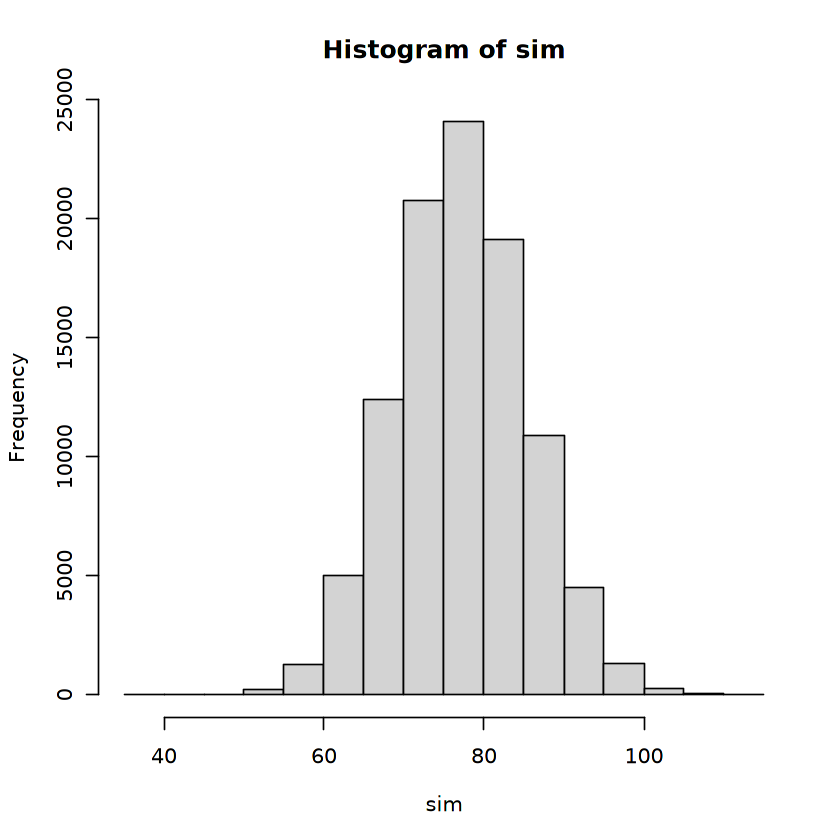

In [5]:
hist(sim)

In [6]:
shared = dim(filter(annot, Caudate == 1, DLPFC == 1, Hippocampus == 1, `Dentate Gyrus` == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 115"
[1] "The overlap is: 198"
[1] "The p-value < 1e-05"


### Three brain regions

#### Caudate vs DLPFC vs Hippocampus

In [11]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, DLPFC == 1)$gene_id, 
                           filter(annot, Hippocampus == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    D=sample(1:total, dlpfc); 
    H=sample(1:total, hippocampus); 
    return(length(Reduce(intersect, list(C,D,H))))
}))

hist(sim)

In [13]:
shared = dim(filter(annot, Caudate == 1, DLPFC == 1, Hippocampus == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 754"
[1] "The overlap is: 786"
[1] "The p-value < 1e-04"


#### Caudate vs DLPFC vs Dentate Gyrus

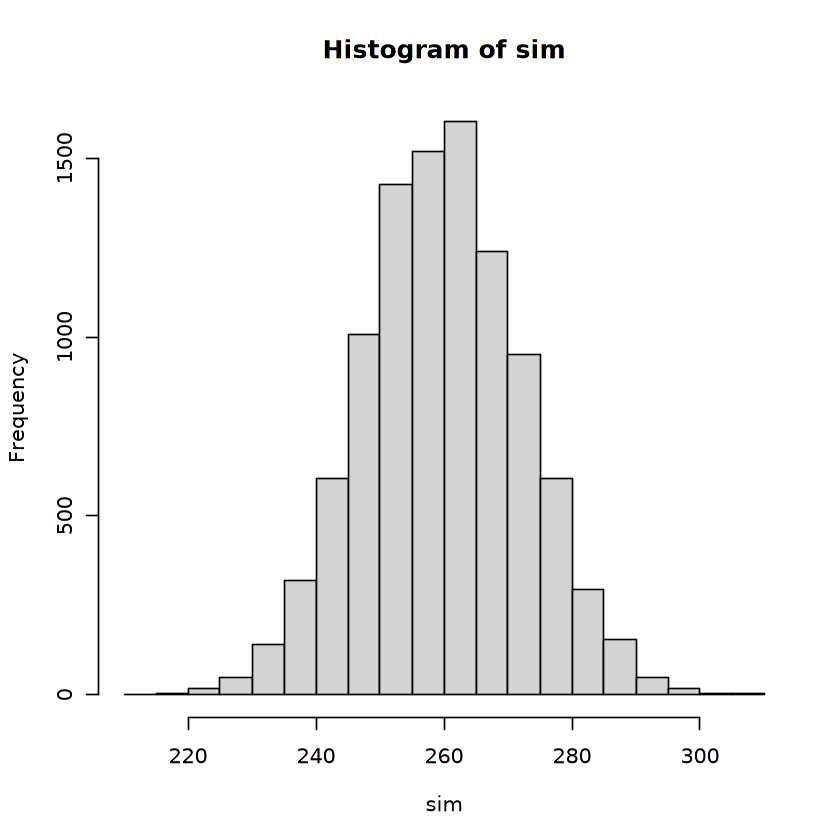

In [14]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, DLPFC == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    D=sample(1:total, dlpfc); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(C,D,G))))
}))

hist(sim)

In [15]:
shared = dim(filter(annot, Caudate == 1, DLPFC == 1, `Dentate Gyrus` == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 309"
[1] "The overlap is: 225"
[1] "The p-value < 1"


#### Caudate vs Hippocampus vs Dentate Gyrus

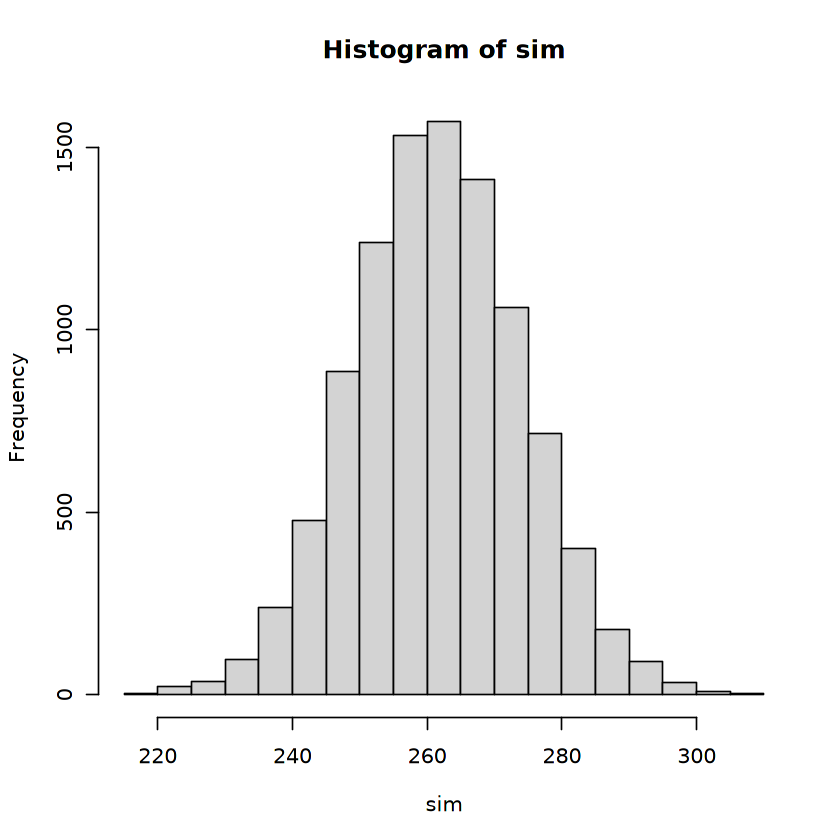

In [16]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, Hippocampus == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    H=sample(1:total, hippocampus); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(C,H,G))))
}))

hist(sim)

In [17]:
shared = dim(filter(annot, Caudate == 1, `Dentate Gyrus` == 1, Hippocampus == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 309"
[1] "The overlap is: 232"
[1] "The p-value < 0.99"


#### DLPFC vs Hippocampus vs Dentate Gyrus

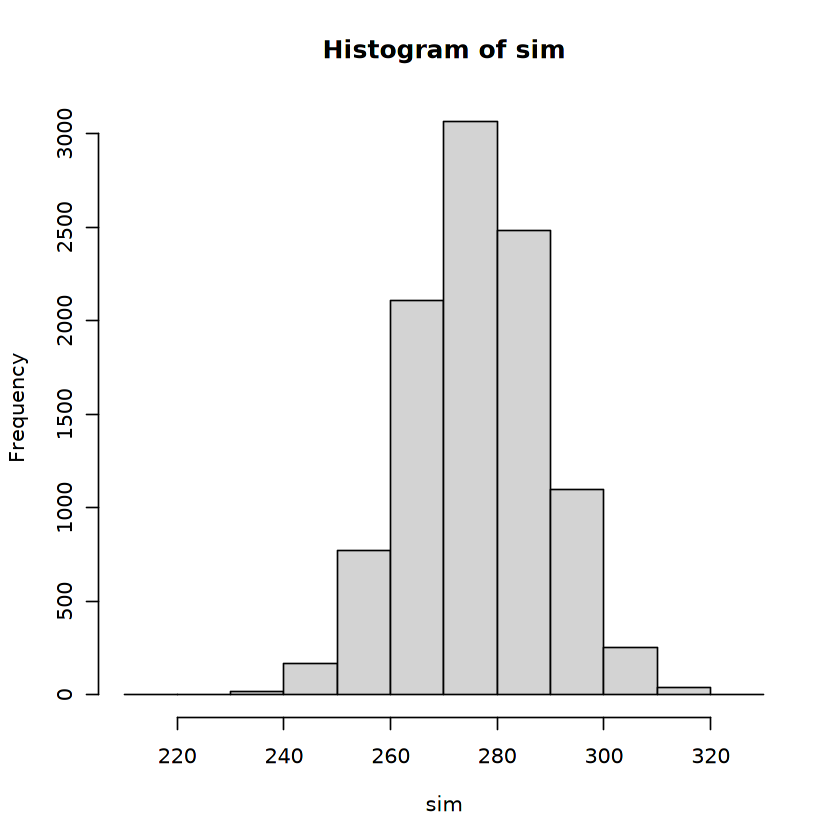

In [18]:
total = Reduce(union, list(filter(annot, Hippocampus == 1)$gene_id, 
                           filter(annot, DLPFC == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    D=sample(1:total, dlpfc); 
    H=sample(1:total, hippocampus); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(D,H,G))))
}))

hist(sim)

In [19]:
shared = dim(filter(annot, `Dentate Gyrus` == 1, DLPFC == 1, Hippocampus == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 328"
[1] "The overlap is: 264"
[1] "The p-value < 0.86"


### Two brain regions

#### Caudate vs DLPFC

In [4]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, DLPFC == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    D=sample(1:total, dlpfc); 
    return(length(Reduce(intersect, list(C,D))))
}))

hist(sim)

In [6]:
shared = dim(filter(annot, Caudate == 1, DLPFC == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 115"
[1] "The overlap is: 198"
[1] "The p-value < 1e-05"


#### Caudate vs Hippocampus

In [4]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, Hippocampus == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    H=sample(1:total, hippocampus); 
    return(length(Reduce(intersect, list(C,H))))
}))

hist(sim)

In [6]:
shared = dim(filter(annot, Caudate == 1, Hippocampus == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 115"
[1] "The overlap is: 198"
[1] "The p-value < 1e-05"


#### Caudate vs Dentate Gyrus

In [4]:
total = Reduce(union, list(filter(annot, Caudate == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    C=sample(1:total, caudate); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(C,G))))
}))

hist(sim)

In [6]:
shared = dim(filter(annot, Caudate == 1, `Dentate Gyrus` == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 115"
[1] "The overlap is: 198"
[1] "The p-value < 1e-05"


#### DLPFC vs Hippocampus

In [4]:
total = Reduce(union, list(filter(annot, DLPFC == 1)$gene_id, 
                           filter(annot, Hippocampus == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    D=sample(1:total, dlpfc); 
    H=sample(1:total, hippocampus); 
    return(length(Reduce(intersect, list(D,H))))
}))

hist(sim)

In [6]:
shared = dim(filter(annot, DLPFC == 1, Hippocampus == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 115"
[1] "The overlap is: 198"
[1] "The p-value < 1e-05"


#### DLPFC vs Dentate Gyrus

In [4]:
total = Reduce(union, list(filter(annot, DLPFC == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    D=sample(1:total, dlpfc); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(D,G))))
}))

hist(sim)

In [6]:
shared = dim(filter(annot, DLPFC == 1, `Dentate Gyrus` == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 115"
[1] "The overlap is: 198"
[1] "The p-value < 1e-05"


#### Hippocampus vs Dentate Gyrus

In [4]:
total = Reduce(union, list(filter(annot, Hippocampus == 1)$gene_id, 
                           filter(annot, `Dentate Gyrus` == 1)$gene_id)) %>% length

sim = unlist(lapply(1:10000, function(i){
    H=sample(1:total, hippocampus); 
    G=sample(1:total, gyrus);
    return(length(Reduce(intersect, list(H,G))))
}))

hist(sim)

In [6]:
shared = dim(filter(annot, Hippocampus == 1, `Dentate Gyrus` == 1))[1]
print(paste("The max overlap from simulation:",max(sim)))
print(paste("The overlap is:", shared))
## Zero instances are greater than overlap
## So pvalues is 1 / (10000 + 1), adding my value into this
pval1 = (sum(sim >= shared) + 1) / (10000 + 1)
pval2 = (sum(sim <= shared) + 1) / (10000 + 1)
print(paste("Enrichment p-value <",format(pval1, digits=2)))
print(paste("Depletion p-value <",format(pval2, digits=2)))

[1] "The max overlap from simulation: 115"
[1] "The overlap is: 198"
[1] "The p-value < 1e-05"


## Reproducibility Information

In [ ]:
print("Reproducibility Information:")
Sys.time()
proc.time()
options(width=120)
sessioninfo::session_info()